In [ ]:
! pip install openpyxl
! pip install pandas
! pip install matplotlib

In [1]:
import pandas as pd
import openpyxl
import json
import sys
sys.path.append("..")
from utils.github_utils import GithubUtils
from utils.java_code_cleaner import JavaCodeCleaner
from utils.code_smells import CodeSmells
from utils.dataset_utils import *

In [64]:
mlcq_dataset_file_path = "./input/raw/mlcq_raw_dataset.csv"

#! Open & Sort MLCQ_Dataset
originalDf = pd.read_csv(
    mlcq_dataset_file_path, on_bad_lines="skip").sort_values(by=["sample_id", "reviewer_id", "smell"])

# display(originalDf)


#! Digitalize Severity Value
severity_digital_values = {
    "none": 0,
    "minor": 1,
    "major": 2,
    "critical": 3
}

originalDf["severity"] = originalDf["severity"].replace(
    severity_digital_values
).astype(int)

# display(originalDf)

#! Apply Naming Convention
originalDf.loc[originalDf["type"] == "function", "type"] = "Method"
originalDf.loc[originalDf["type"] == "class", "type"] = "Class"

originalDf.loc[originalDf["smell"] == "blob", "smell"] = CodeSmells.GodClass
originalDf.loc[originalDf["smell"] ==
               "data class", "smell"] = CodeSmells.DataClass
originalDf.loc[originalDf["smell"] ==
               "feature envy", "smell"] = CodeSmells.FeatureEnvy
originalDf.loc[originalDf["smell"] ==
               "long method", "smell"] = CodeSmells.LongMethod

# display(originalDf)

#! Group By CodeName & Smell
groupedBySmellDf = originalDf.groupby(["code_name", "smell", "type"], as_index=False).agg(
    repository=("repository", "first"),
    commit_hash=("commit_hash", "first"),
    file_path=("path", "first"),
    github_url=("link", "first"),
    start_line=("start_line", "first"),
    end_line=("end_line", "first"),
    severity_sum=("severity", "sum"),
    reviewers_count=("reviewer_id", "count")
)

groupedBySmellDf["smelliness_degree"] = groupedBySmellDf.apply(
    lambda row: row["severity_sum"] / row["reviewers_count"], axis=1
)

preprocessedDf = groupedBySmellDf

display(preprocessedDf)


#! Save Processed Dataset to a CSV file
mlcq_processed_dataset_csv_path = "./input/processed/mlcq_processed_dataset.csv"
preprocessedDf.to_csv(mlcq_processed_dataset_csv_path, index=False)


#! Save Processed Dataset to a XLSX file
# mlcq_processed_dataset_xlsx_path = "./input/processed/mlcq_processed_dataset.xlsx"
# preprocessedDf.to_excel(mlcq_processed_dataset_xlsx_path, index=False, engine='openpyxl')

/var/folders/2w/crm4crcx47q8y6l_5h_49ldr0000gn/T/ipykernel_32898/1787317864.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  originalDf["severity"] = originalDf["severity"].replace(


,code_name,smell,type,repository,commit_hash,file_path,github_url,start_line,end_line,severity_sum,reviewers_count,smelliness_degree
0,Ajdoc14Source#doAssert,FeatureEnvy,Method,git@github.com:eclipse/org.aspectj.git,370f291c359cd159c5f3f0abd6e9e53e81234a07,/taskdefs/testdata/Ajdoc14Source.java,https://github.com/eclipse/org.aspectj/blob/37...,10,12,0,1,0.0
1,Ajdoc14Source#doAssert,LongMethod,Method,git@github.com:eclipse/org.aspectj.git,370f291c359cd159c5f3f0abd6e9e53e81234a07,/taskdefs/testdata/Ajdoc14Source.java,https://github.com/eclipse/org.aspectj/blob/37...,10,12,0,1,0.0
2,AutonomousDatawarehouseExample.createAdwWallet...,FeatureEnvy,Method,git@github.com:oracle/oci-java-sdk.git,76e9cecd7b309d9f12e5efe96c74167c66a98872,/bmc-examples/src/main/java/AutonomousDataware...,https://github.com/oracle/oci-java-sdk/blob/76...,186,189,0,1,0.0
3,AutonomousDatawarehouseExample.createAdwWallet...,LongMethod,Method,git@github.com:oracle/oci-java-sdk.git,76e9cecd7b309d9f12e5efe96c74167c66a98872,/bmc-examples/src/main/java/AutonomousDataware...,https://github.com/oracle/oci-java-sdk/blob/76...,186,189,0,1,0.0
4,Blort#test5,FeatureEnvy,Method,git@github.com:facebook/buck.git,1bc8d383ea5cb153ca9bf4f2807e6be498648523,/third-party/java/dx/tests/065-dex-new-array/B...,https://github.com/facebook/buck/blob/1bc8d383...,35,37,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8803,tv.sage.SageRuntimeException,GodClass,Class,git@github.com:google/sagetv.git,a35e3a450b4c0134cb097b9e7de76dca08eb6654,/java/tv/sage/SageRuntimeException.java,https://github.com/google/sagetv/blob/a35e3a45...,23,68,0,3,0.0
8804,userguide.clients.EchoNonBlockingClient,DataClass,Class,git@github.com:apache/axis2-java.git,372582df483eb7991f85b6d0e765aec62339cdb7,/modules/samples/userguide/src/userguide/clien...,https://github.com/apache/axis2-java/blob/3725...,34,99,0,1,0.0
8805,userguide.clients.EchoNonBlockingClient,GodClass,Class,git@github.com:apache/axis2-java.git,372582df483eb7991f85b6d0e765aec62339cdb7,/modules/samples/userguide/src/userguide/clien...,https://github.com/apache/axis2-java/blob/3725...,34,99,0,1,0.0
8806,websocket.drawboard.Client,DataClass,Class,git@github.com:apache/tomcat.git,a9c1a0661198d9ba37c1facd8385fe05d538c4ad,/webapps/examples/WEB-INF/classes/websocket/dr...,https://github.com/apache/tomcat/blob/a9c1a066...,37,230,0,1,0.0


,id,reviewer_id,sample_id,smell,severity,review_timestamp,type,code_name,repository,commit_hash,path,start_line,end_line,link,is_from_industry_relevant_project
1254,1901,5,3698323,blob,none,2019-03-29 14:32:15.701013,class,com.amazon.ask.dispatcher.request.handler.impl...,git@github.com:alexa/alexa-skills-kit-sdk-for-...,bf1e9ccc50d1f3f8408f887f70197ee288fd4bd9,/ask-sdk-core/src/com/amazon/ask/dispatcher/re...,26,59,https://github.com/alexa/alexa-skills-kit-sdk-...,1
1255,1902,5,3698323,data class,none,2019-03-29 14:32:15.703950,class,com.amazon.ask.dispatcher.request.handler.impl...,git@github.com:alexa/alexa-skills-kit-sdk-for-...,bf1e9ccc50d1f3f8408f887f70197ee288fd4bd9,/ask-sdk-core/src/com/amazon/ask/dispatcher/re...,26,59,https://github.com/alexa/alexa-skills-kit-sdk-...,1
1250,1895,1,3698602,feature envy,none,2019-03-29 14:31:44.077416,function,com.amazon.ask.request.mapper.impl.BaseRequest...,git@github.com:alexa/alexa-skills-kit-sdk-for-...,bf1e9ccc50d1f3f8408f887f70197ee288fd4bd9,/ask-sdk-runtime/src/com/amazon/ask/request/ma...,79,81,https://github.com/alexa/alexa-skills-kit-sdk-...,1
1251,1896,1,3698602,long method,none,2019-03-29 14:31:44.078215,function,com.amazon.ask.request.mapper.impl.BaseRequest...,git@github.com:alexa/alexa-skills-kit-sdk-for-...,bf1e9ccc50d1f3f8408f887f70197ee288fd4bd9,/ask-sdk-runtime/src/com/amazon/ask/request/ma...,79,81,https://github.com/alexa/alexa-skills-kit-sdk-...,1
1249,1894,5,3698860,feature envy,none,2019-03-29 14:31:41.945515,function,com.alibaba.android.arouter.facade.model.Route...,git@github.com:alibaba/ARouter.git,93b328569bbdbf75e4aa87f0ecf48c69600591b2,/arouter-annotation/src/main/java/com/alibaba/...,200,213,https://github.com/alibaba/ARouter/blob/93b328...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4420,5353,5,9542718,long method,none,2019-04-12 15:14:15.188749,function,org.apache.hadoop.mapred.NotRunningJob#killTas...,git@github.com:apache/hadoop.git,128dd91e10080bdcbcd7d555fa3c4105e55a6b51,/hadoop-mapreduce-project/hadoop-mapreduce-cli...,213,219,https://github.com/apache/hadoop/blob/128dd91e...,1
8465,9733,10,9548458,blob,none,2019-07-24 11:09:49.903954,class,org.apache.hadoop.metrics2.sink.ganglia.Gangli...,git@github.com:apache/hadoop.git,128dd91e10080bdcbcd7d555fa3c4105e55a6b51,/hadoop-common-project/hadoop-common/src/main/...,46,253,https://github.com/apache/hadoop/blob/128dd91e...,1
8466,9734,10,9548458,data class,none,2019-07-24 11:09:49.907562,class,org.apache.hadoop.metrics2.sink.ganglia.Gangli...,git@github.com:apache/hadoop.git,128dd91e10080bdcbcd7d555fa3c4105e55a6b51,/hadoop-common-project/hadoop-common/src/main/...,46,253,https://github.com/apache/hadoop/blob/128dd91e...,1
3858,4722,20,9553496,blob,none,2019-04-12 13:21:10.476452,class,org.apache.hadoop.yarn.server.nodemanager.reco...,git@github.com:apache/hadoop.git,128dd91e10080bdcbcd7d555fa3c4105e55a6b51,/hadoop-yarn-project/hadoop-yarn/hadoop-yarn-s...,41,294,https://github.com/apache/hadoop/blob/128dd91e...,1


{'repository': 457,
 'commit_hash': 457,
 'path': 4208,
 'link': 4413,
 'code_name': 4413}

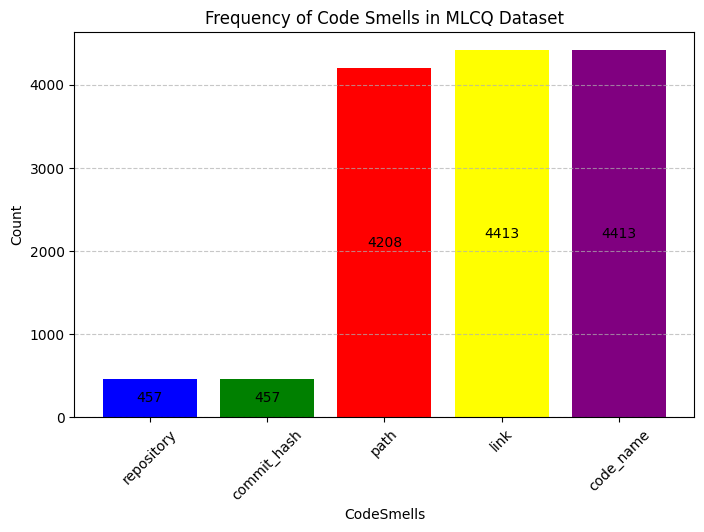

In [44]:
import matplotlib.pyplot as plt

#! Open & Sort MLCQ_Dataset
originalDf = pd.read_csv(
    mlcq_dataset_file_path, on_bad_lines="skip").sort_values(by=["sample_id", "reviewer_id", "smell"])

display(originalDf)

# Count occurrences of each code smell
code_smell_counts = {
    "repository": originalDf["repository"].nunique(),
    "commit_hash": originalDf["commit_hash"].nunique(),
    "path": originalDf["path"].nunique(),
    "link": originalDf["link"].nunique(),
    "code_name": originalDf["code_name"].nunique(),
}

display(code_smell_counts)

# Plot the code smell counts
plt.figure(figsize=(8, 5))
bars = plt.bar(code_smell_counts.keys(), code_smell_counts.values(),
               color=['blue', 'green', 'red', 'yellow', 'purple'])
plt.xlabel("CodeSmells")
plt.ylabel("Count")
plt.title("Frequency of Code Smells in MLCQ Dataset")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height / 2,  # Slightly above the bar
             f'{int(height)}', ha='center', va='center', fontsize=10)

# Show the plot
plt.show()

In [ ]:
mlcq_processed_dataset_csv_path = "./input/processed/mlcq_processed_dataset.csv"

#! Open & MLCQ_Dataset
preprocessedDf = pd.read_csv(
    mlcq_processed_dataset_csv_path, on_bad_lines="skip")

display(preprocessedDf)


#! Cols names:
id_col = "id"
type_col = "type"
github_url_col = "github_url"
github_raw_url_col = "github_raw_url"
is_data_class_col = CodeSmells.isDataClass
is_feature_envy_col = CodeSmells.isFeatureEnvy
is_god_class_col = CodeSmells.isGodClass
is_long_method_col = CodeSmells.isLongMethod

intermediate_dataset = {
    id_col: [],  # A sequential Id
    type_col: [],  # Class vs Method
    github_url_col: [],  # Github normal URL of the instance
    github_raw_url_col: [],  # Github Raw URL of the instance
    is_data_class_col: [],  # 1 If Instance has a DataClass Smell, Otherwise 0
    is_feature_envy_col: [],  # 1 If Instance has a FeatureEnvy Smell, Otherwise 0
    is_god_class_col: [],  # 1 If Instance has a GodClass Smell, Otherwise 0
    is_long_method_col: [],  # 1 If Instance has a LongMethod Smell, Otherwise 0
}

previous_url = "" #preprocessedDf.loc[0]["github_url"]
for i, row in preprocessedDf.iterrows():
        if row["github_url"] != previous_url:
            previous_url = row["github_url"]
            intermediate_dataset[id_col].append(i // 2 + 1)
            intermediate_dataset[type_col].append(row["type"])
            intermediate_dataset[github_url_col].append(
                row["github_url"])
            intermediate_dataset[github_raw_url_col].append(
                GithubUtils.convert_blob_to_raw_url(row["github_url"]))
            intermediate_dataset[is_data_class_col].append(0)
            intermediate_dataset[is_feature_envy_col].append(0)
            intermediate_dataset[is_god_class_col].append(0)
            intermediate_dataset[is_long_method_col].append(0)
        if row["type"] == "Class":
            if row["smell"] == CodeSmells.DataClass:
                intermediate_dataset[is_data_class_col][-1] = 1 if row["smelliness_degree"] > 0.5 else 0
            if row["smell"] == CodeSmells.GodClass:
                intermediate_dataset[is_god_class_col][-1] = 1 if row["smelliness_degree"] > 0.5 else 0
        if row["type"] == "Method":
            if row["smell"] == CodeSmells.FeatureEnvy:
                intermediate_dataset[is_feature_envy_col][-1] = 1 if row["smelliness_degree"] > 0.5 else 0
            if row["smell"] == CodeSmells.LongMethod:
                intermediate_dataset[is_long_method_col][-1] = 1 if row["smelliness_degree"] > 0.5 else 0


intermediate_dataset_df = pd.DataFrame(intermediate_dataset)

display(intermediate_dataset_df)


#! Save Intermediate Dataset to a CSV file
mlcq_intermediate_dataset_csv_path = "./output/mlcq_intermediate_dataset.csv"
intermediate_dataset_df.to_csv(mlcq_intermediate_dataset_csv_path, index=False)


# #! Save Intermediate Dataset to a XLSX file
# intermediate_dataset_xlsx_path = "./output/mlcq_intermediate_dataset.xlsx"
# intermediate_dataset_df.to_excel(intermediate_dataset_xlsx_path, index=False, engine='openpyxl')

,code_name,smell,type,repository,commit_hash,file_path,github_url,start_line,end_line,severity_sum,reviewers_count,smelliness_degree
0,Ajdoc14Source#doAssert,FeatureEnvy,Method,git@github.com:eclipse/org.aspectj.git,370f291c359cd159c5f3f0abd6e9e53e81234a07,/taskdefs/testdata/Ajdoc14Source.java,https://github.com/eclipse/org.aspectj/blob/37...,10,12,0,1,0.0
1,Ajdoc14Source#doAssert,LongMethod,Method,git@github.com:eclipse/org.aspectj.git,370f291c359cd159c5f3f0abd6e9e53e81234a07,/taskdefs/testdata/Ajdoc14Source.java,https://github.com/eclipse/org.aspectj/blob/37...,10,12,0,1,0.0
2,AutonomousDatawarehouseExample.createAdwWallet...,FeatureEnvy,Method,git@github.com:oracle/oci-java-sdk.git,76e9cecd7b309d9f12e5efe96c74167c66a98872,/bmc-examples/src/main/java/AutonomousDataware...,https://github.com/oracle/oci-java-sdk/blob/76...,186,189,0,1,0.0
3,AutonomousDatawarehouseExample.createAdwWallet...,LongMethod,Method,git@github.com:oracle/oci-java-sdk.git,76e9cecd7b309d9f12e5efe96c74167c66a98872,/bmc-examples/src/main/java/AutonomousDataware...,https://github.com/oracle/oci-java-sdk/blob/76...,186,189,0,1,0.0
4,Blort#test5,FeatureEnvy,Method,git@github.com:facebook/buck.git,1bc8d383ea5cb153ca9bf4f2807e6be498648523,/third-party/java/dx/tests/065-dex-new-array/B...,https://github.com/facebook/buck/blob/1bc8d383...,35,37,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8803,tv.sage.SageRuntimeException,GodClass,Class,git@github.com:google/sagetv.git,a35e3a450b4c0134cb097b9e7de76dca08eb6654,/java/tv/sage/SageRuntimeException.java,https://github.com/google/sagetv/blob/a35e3a45...,23,68,0,3,0.0
8804,userguide.clients.EchoNonBlockingClient,DataClass,Class,git@github.com:apache/axis2-java.git,372582df483eb7991f85b6d0e765aec62339cdb7,/modules/samples/userguide/src/userguide/clien...,https://github.com/apache/axis2-java/blob/3725...,34,99,0,1,0.0
8805,userguide.clients.EchoNonBlockingClient,GodClass,Class,git@github.com:apache/axis2-java.git,372582df483eb7991f85b6d0e765aec62339cdb7,/modules/samples/userguide/src/userguide/clien...,https://github.com/apache/axis2-java/blob/3725...,34,99,0,1,0.0
8806,websocket.drawboard.Client,DataClass,Class,git@github.com:apache/tomcat.git,a9c1a0661198d9ba37c1facd8385fe05d538c4ad,/webapps/examples/WEB-INF/classes/websocket/dr...,https://github.com/apache/tomcat/blob/a9c1a066...,37,230,0,1,0.0


,id,type,github_url,github_raw_url,isDataClass,isFeatureEnvy,isGodClass,isLongMethod
0,1,Method,https://github.com/eclipse/org.aspectj/blob/37...,https://raw.githubusercontent.com/eclipse/org....,0,0,0,0
1,2,Method,https://github.com/oracle/oci-java-sdk/blob/76...,https://raw.githubusercontent.com/oracle/oci-j...,0,0,0,0
2,3,Method,https://github.com/facebook/buck/blob/1bc8d383...,https://raw.githubusercontent.com/facebook/buc...,0,0,0,0
3,4,Method,https://github.com/eclipse/org.aspectj/blob/37...,https://raw.githubusercontent.com/eclipse/org....,0,1,0,1
4,5,Class,https://github.com/eclipse/org.aspectj/blob/37...,https://raw.githubusercontent.com/eclipse/org....,0,0,0,0
...,...,...,...,...,...,...,...,...
4408,4400,Class,https://github.com/eclipse/xtext-xtend/blob/20...,https://raw.githubusercontent.com/eclipse/xtex...,0,0,0,0
4409,4401,Method,https://github.com/eclipse/xtext-eclipse/blob/...,https://raw.githubusercontent.com/eclipse/xtex...,0,0,0,0
4410,4402,Class,https://github.com/google/sagetv/blob/a35e3a45...,https://raw.githubusercontent.com/google/saget...,1,0,0,0
4411,4403,Class,https://github.com/apache/axis2-java/blob/3725...,https://raw.githubusercontent.com/apache/axis2...,0,0,0,0


{'DataClass': np.int64(366),
 'GodClass': np.int64(344),
 'FeatureEnvy': np.int64(151),
 'LongMethod': np.int64(254)}

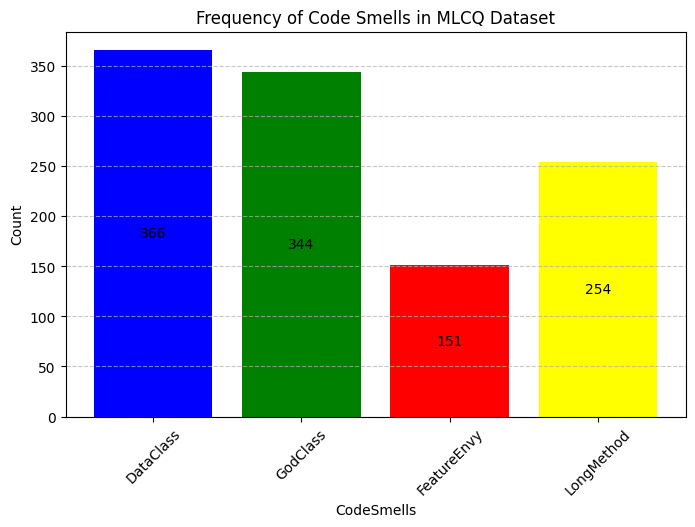

In [39]:
import matplotlib.pyplot as plt

mlcq_intermediate_dataset_csv_path = "./output/mlcq_intermediate_dataset.csv"

#! Open Intermediate Dataset
mlcqDf = pd.read_csv(
    mlcq_intermediate_dataset_csv_path, on_bad_lines="skip")

# Count occurrences of each code smell
code_smell_counts = {
    "DataClass": mlcqDf[CodeSmells.isDataClass].sum(),
    "GodClass": mlcqDf[CodeSmells.isGodClass].sum(),
    "FeatureEnvy": mlcqDf[CodeSmells.isFeatureEnvy].sum(),
    "LongMethod": mlcqDf[CodeSmells.isLongMethod].sum(),
}

display(code_smell_counts)

# Plot the code smell counts
plt.figure(figsize=(8, 5))
bars = plt.bar(code_smell_counts.keys(), code_smell_counts.values(),
        color=['blue', 'green', 'red', 'yellow'])
plt.xlabel("CodeSmells")
plt.ylabel("Count")
plt.title("Frequency of Code Smells in MLCQ Dataset")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height / 2,  # Slightly above the bar
             f'{int(height)}', ha='center', va='center', fontsize=10)

# Show the plot
plt.show()

In [118]:
import json
import pandas as pd

mlcq_intermediate_dataset_csv_path = "./output/mlcq_intermediate_dataset.csv"

#! Open Intermediate Dataset
mlcqDf = pd.read_csv(
    mlcq_intermediate_dataset_csv_path, on_bad_lines="skip")


display(mlcqDf)

mld_class_items = []
mld_method_items = []

notSourceCode = []
notCleanCode = []

processed_source_code = ""

for i, row in mlcqDf.iterrows():
    if row["type"] == "Method":
        if i % 100 == 0:
            print("O" * 50)
            display(i)
            print("O" * 50)
        
        source_code = GithubUtils.clone_code(row["github_raw_url"])
        if not source_code:
            notSourceCode.append(row["github_url"])
            print("#", i)
        if source_code:
            processed_source_code = JavaCodeCleaner.clean_by_cleaner_api(source_code)
            if not processed_source_code:
                notCleanCode.append(row["github_url"])
                print("*", i)
                processed_source_code = row["github_url"]
            if processed_source_code:
                code_smells = []
                if row["type"] == "Class":
                    if row[CodeSmells.isGodClass] == 1:
                        code_smells.append(CodeSmells.GodClass)
                    if row[CodeSmells.isDataClass] == 1:
                        code_smells.append(CodeSmells.DataClass)
                    
                    mld_class_items.append(
                        JsonDatasetUtils.create_item(
                            code_smells, processed_source_code
                        )
                    )

                if row["type"] == "Method":
                    if row[CodeSmells.isLongMethod] == 1:
                        code_smells.append(CodeSmells.LongMethod)
                    if row[CodeSmells.isFeatureEnvy] == 1:
                        code_smells.append(CodeSmells.FeatureEnvy)

                    mld_method_items.append(
                        JsonDatasetUtils.create_item(
                            code_smells, processed_source_code
                        )
                    )

mlcq_class_mld_path = "./output/mlcq_class_mld.json"
mlcq_method_mld_path = "./output/mlcq_method_mld.json"

# with open(mlcq_class_mld_path, 'w') as mld_json:
#     json.dump(mld_class_items, mld_json)
#     mld_json.write('\n')

with open(mlcq_method_mld_path, 'w') as mld_json:
    json.dump(mld_method_items, mld_json)
    mld_json.write('\n')

,id,type,github_url,github_raw_url,isDataClass,isFeatureEnvy,isGodClass,isLongMethod
0,1,Method,https://github.com/eclipse/org.aspectj/blob/37...,https://raw.githubusercontent.com/eclipse/org....,0,0,0,0
1,2,Method,https://github.com/oracle/oci-java-sdk/blob/76...,https://raw.githubusercontent.com/oracle/oci-j...,0,0,0,0
2,3,Method,https://github.com/facebook/buck/blob/1bc8d383...,https://raw.githubusercontent.com/facebook/buc...,0,0,0,0
3,4,Method,https://github.com/eclipse/org.aspectj/blob/37...,https://raw.githubusercontent.com/eclipse/org....,0,1,0,1
4,5,Class,https://github.com/eclipse/org.aspectj/blob/37...,https://raw.githubusercontent.com/eclipse/org....,0,0,0,0
...,...,...,...,...,...,...,...,...
4408,4400,Class,https://github.com/eclipse/xtext-xtend/blob/20...,https://raw.githubusercontent.com/eclipse/xtex...,0,0,0,0
4409,4401,Method,https://github.com/eclipse/xtext-eclipse/blob/...,https://raw.githubusercontent.com/eclipse/xtex...,0,0,0,0
4410,4402,Class,https://github.com/google/sagetv/blob/a35e3a45...,https://raw.githubusercontent.com/google/saget...,1,0,0,0
4411,4403,Class,https://github.com/apache/axis2-java/blob/3725...,https://raw.githubusercontent.com/apache/axis2...,0,0,0,0


OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO


0

OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO


100

OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
404: FAILED Code Clone
# 137
404: FAILED Code Clone
# 138
404: FAILED Code Clone
# 139
404: FAILED Code Clone
# 140
* 149
OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO


200

OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
* 581
* 586
OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO


600

OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO


700

OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO


800

OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
* 884
404: FAILED Code Clone
# 1051
404: FAILED Code Clone
# 1052
404: FAILED Code Clone
# 1053
404: FAILED Code Clone
# 1054
404: FAILED Code Clone
# 1058
404: FAILED Code Clone
# 1061
404: FAILED Code Clone
# 1062
404: FAILED Code Clone
# 1063
404: FAILED Code Clone
# 1064
404: FAILED Code Clone
# 1065
404: FAILED Code Clone
# 1066
404: FAILED Code Clone
# 1067
OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO


1200

OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO


1300

OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
404: FAILED Code Clone
# 1423
404: FAILED Code Clone
# 1424
404: FAILED Code Clone
# 1425
404: FAILED Code Clone
# 1426
404: FAILED Code Clone
# 1428
404: FAILED Code Clone
# 1429
404: FAILED Code Clone
# 1430
404: FAILED Code Clone
# 1432
* 2048
404: FAILED Code Clone
# 2190
OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO


2200

OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO


2400

OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
* 2628
OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO


2700

OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
* 2706
* 2764
OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO


2800

OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO


2900

OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
404: FAILED Code Clone
# 2941
404: FAILED Code Clone
# 2942
404: FAILED Code Clone
# 2945
OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO


3000

OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
404: FAILED Code Clone
# 3008
404: FAILED Code Clone
# 3010
* 3018
* 3028
404: FAILED Code Clone
# 3089
404: FAILED Code Clone
# 3090
404: FAILED Code Clone
# 3091
404: FAILED Code Clone
# 3094
OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO


3100

OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
404: FAILED Code Clone
# 3178
404: FAILED Code Clone
# 3180
404: FAILED Code Clone
# 3181
404: FAILED Code Clone
# 3182
404: FAILED Code Clone
# 3184
404: FAILED Code Clone
# 3187
404: FAILED Code Clone
# 3189
404: FAILED Code Clone
# 3190
404: FAILED Code Clone
# 3193
404: FAILED Code Clone
# 3197
404: FAILED Code Clone
# 3198
404: FAILED Code Clone
# 3199
OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO


3200

OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
404: FAILED Code Clone
# 3291
OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO


3300

OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
404: FAILED Code Clone
# 3305
404: FAILED Code Clone
# 3308
404: FAILED Code Clone
# 3309
404: FAILED Code Clone
# 3312
404: FAILED Code Clone
# 3316
404: FAILED Code Clone
# 3317
404: FAILED Code Clone
# 3318
404: FAILED Code Clone
# 3319
404: FAILED Code Clone
# 3321
404: FAILED Code Clone
# 3323
404: FAILED Code Clone
# 3324
404: FAILED Code Clone
# 3325
404: FAILED Code Clone
# 3328
404: FAILED Code Clone
# 3329
404: FAILED Code Clone
# 3331
404: FAILED Code Clone
# 3332
404: FAILED Code Clone
# 3342
404: FAILED Code Clone
# 3344
404: FAILED Code Clone
# 3345
404: FAILED Code Clone
# 3347
404: FAILED Code Clone
# 3353
404: FAILED Code Clone
# 3354
404: FAILED Code Clone
# 3356
404: FAILED Code Clone
# 3359
OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO


3400

OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
404: FAILED Code Clone
# 3428
404: FAILED Code Clone
# 3429
404: FAILED Code Clone
# 3431
404: FAILED Code Clone
# 3434
404: FAILED Code Clone
# 3435
404: FAILED Code Clone
# 3436
404: FAILED Code Clone
# 3438
404: FAILED Code Clone
# 3441
404: FAILED Code Clone
# 3444
404: FAILED Code Clone
# 3447
404: FAILED Code Clone
# 3450
404: FAILED Code Clone
# 3453
404: FAILED Code Clone
# 3454
404: FAILED Code Clone
# 3485
404: FAILED Code Clone
# 3486
404: FAILED Code Clone
# 3488
404: FAILED Code Clone
# 3491
404: FAILED Code Clone
# 3492
404: FAILED Code Clone
# 3494
404: FAILED Code Clone
# 3495
404: FAILED Code Clone
# 3557
404: FAILED Code Clone
# 3562
404: FAILED Code Clone
# 3625
404: FAILED Code Clone
# 3626
404: FAILED Code Clone
# 3627
404: FAILED Code Clone
# 3628
404: FAILED Code Clone
# 3629
404: FAILED Code Clone
# 3630
404: FAILED Code Clone
# 3631
404: FAILED Code Clone
# 3632
404: FAILED Code Clone
# 3633
404: FAILED Code Cl

3700

OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
404: FAILED Code Clone
# 3715
404: FAILED Code Clone
# 3718
404: FAILED Code Clone
# 3721
404: FAILED Code Clone
# 3722
404: FAILED Code Clone
# 3723
404: FAILED Code Clone
# 3724
404: FAILED Code Clone
# 3725
404: FAILED Code Clone
# 3726
404: FAILED Code Clone
# 3730
404: FAILED Code Clone
# 3731
404: FAILED Code Clone
# 3733
404: FAILED Code Clone
# 3734
404: FAILED Code Clone
# 3736
404: FAILED Code Clone
# 3737
404: FAILED Code Clone
# 3738
404: FAILED Code Clone
# 3739
404: FAILED Code Clone
# 3740
404: FAILED Code Clone
# 3742
404: FAILED Code Clone
# 3743
404: FAILED Code Clone
# 3744
404: FAILED Code Clone
# 3749
404: FAILED Code Clone
# 3751
404: FAILED Code Clone
# 3755
404: FAILED Code Clone
# 3756
404: FAILED Code Clone
# 3758
404: FAILED Code Clone
# 3759
404: FAILED Code Clone
# 3760
404: FAILED Code Clone
# 3769
404: FAILED Code Clone
# 3771
404: FAILED Code Clone
# 3773
404: FAILED Code Clone
# 3778
404: FAILED Code Cl

3900

OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
* 4037
404: FAILED Code Clone
# 4071
OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO


4200

OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
404: FAILED Code Clone
# 4349


In [2]:
from utils.java_code_cleaner import JavaCodeCleaner
mlcq_method_mld_path = "./output/mlcq_method_mld.json"

with open(mlcq_method_mld_path, 'r') as mld_json:
    methods = json.load(mld_json)

i = 0
while i < len(methods):
    method = methods[i]
    if method["source_code"][:14] == "https://github":
        code = GithubUtils.clone_code(GithubUtils.convert_blob_to_raw_url(method["source_code"]))
        code = code.replace("default", "private")
        code = code.replace("._", ".method")
        processed_source_code = JavaCodeCleaner.clean_by_cleaner_api(code)
        print(processed_source_code)
        if processed_source_code != "":
            methods[i] = {
                "source_code": processed_source_code,
                "code_smells": methods[i]["code_smells"]
            }
            display("SUCCESS")
        else:
            print(code)
            print(method["source_code"])
    i += 1
        
# with open("./output/mlcq_method_mld_1.json", 'w') as mld_json:
with open("./output/mlcq_method_mld_1.json", 'w', encoding='utf-8') as mld_json:
    json.dump(methods, mld_json, ensure_ascii=False, indent=2)



	 */
	private void getSuggestions(final String query) {
		if (query == null || query.isEmpty()) {
			return;
		}

		// Initialize the locatorSugestion parameters
		locatorParams(SUGGEST_PLACE);

		// Attach a listener to the locator task since
		// the LocatorTask may or may not be loaded the
		// the very first time a user types text into the search box.
		// If the Locator is already loaded, the following listener
		// is invoked immediately.

		mLocator.addDoneLoadingListener(new Runnable() {
			@Override public void run() {
				// Does this locator support suggestions?
				if (mLocator.getLoadStatus().name() != LoadStatus.LOADED.name()){
					//Log.i(TAG,"##### " + mLocator.getLoadStatus().name());
				} else if (!mLocator.getLocatorInfo().isSupportsSuggestions()){
					return;
				}
				//og.i(TAG,"****** " + mLocator.getLoadStatus().name());
				final ListenableFuture<List<SuggestResult>> suggestionsFuture = mLocator.suggestAsync(query, suggestParams);
				// Attach a done liste

'SUCCESS'

public static Element getParent(Element elem){Node parent=elem.getParentNode();if(parent instanceof Element)return(Element)parent;return null;}


'SUCCESS'

private int getGroupSequence(){return 0;}


'SUCCESS'

@Override public CODE<T>a(String selector,String href,String anchorText){return setSelector(a(),selector).$href(href).method(anchorText).method();}


'SUCCESS'

private boolean hasDataFromHttp(){return false;}


'SUCCESS'

private V get(K key){try{return getAsync(key).get();}catch(InterruptedException | ExecutionException e){throw new SamzaException("GET failed for "+key,e);}}


'SUCCESS'

private BooleanConsumer andThen(BooleanConsumer after){Objects.requireNonNull(after);return(boolean t)->{accept(t);after.accept(t);};}


'SUCCESS'

static ClassLoader findClassLoader()throws ConfigurationError{ClassLoader context=SecuritySupport.getContextClassLoader();ClassLoader system=SecuritySupport.getSystemClassLoader();ClassLoader chain=system;while(true){if(context==chain){ClassLoader current=ObjectFactory.class.getClassLoader();chain=system;while(true){if(current==chain){return system;}if(chain==null){break;}chain=SecuritySupport.getParentClassLoader(chain);}return current;}if(chain==null){break;}chain=SecuritySupport.getParentClassLoader(chain);};return context;}


'SUCCESS'

public static boolean isValidNmtoken(String nmtoken){if(nmtoken.length()==0)return false;for(int i=0;i<nmtoken.length();i++){char ch=nmtoken.charAt(i);if(!isName(ch)){return false;}}return true;}


'SUCCESS'

private void appTypeUrlFocusLost(java.awt.event.FocusEvent evt){appTypeUrl.setSelectionEnd(0);}


'SUCCESS'

In [3]:
code = """
	private void getSuggestions(final String query) {
		if (query == null || query.isEmpty()) {
			return;
		}

		// Initialize the locatorSugestion parameters
		locatorParams(SUGGEST_PLACE);

		// Attach a listener to the locator task since
		// the LocatorTask may or may not be loaded the
		// the very first time a user types text into the search box.
		// If the Locator is already loaded, the following listener
		// is invoked immediately.

		mLocator.addDoneLoadingListener(new Runnable() {
			@Override public void run() {
				// Does this locator support suggestions?
				if (mLocator.getLoadStatus().name() != LoadStatus.LOADED.name()){
					//Log.i(TAG,"##### " + mLocator.getLoadStatus().name());
				} else if (!mLocator.getLocatorInfo().isSupportsSuggestions()){
					return;
				}
				//og.i(TAG,"****** " + mLocator.getLoadStatus().name());
				final ListenableFuture<List<SuggestResult>> suggestionsFuture = mLocator.suggestAsync(query, suggestParams);
				// Attach a done listener that executes upon completion of the async call
				suggestionsFuture.addDoneListener(new Runnable() {
					@Override
					public void run() {
						try {
							// Get the suggestions returned from the locator task.
							// Store retrieved suggestions for future use (e.g. if the user
							// selects a retrieved suggestion, it can easily be
							// geocoded).
							mSuggestionsList = suggestionsFuture.get();

							showSuggestedPlaceNames(mSuggestionsList);

						} catch (Exception e) {
							Log.e(TAG, "Error on getting suggestions " + e.getMessage());
						}
					}
				});
			}
		});
		// Initiate the asynchronous call
		mLocator.loadAsync();
	}
"""
processed_source_code = JavaCodeCleaner.clean_by_cleaner_api(code)

display(processed_source_code)


'private void getSuggestions(final String query){if(query==null || query.isEmpty()){return;}locatorParams(SUGGEST_PLACE);mLocator.addDoneLoadingListener(new Runnable(){@Override public void run(){if(mLocator.getLoadStatus().name()!=LoadStatus.LOADED.name()){}else if(!mLocator.getLocatorInfo().isSupportsSuggestions()){return;}final ListenableFuture<List<SuggestResult>>suggestionsFuture=mLocator.suggestAsync(query,suggestParams);suggestionsFuture.addDoneListener(new Runnable(){@Override public void run(){try{mSuggestionsList=suggestionsFuture.get();showSuggestedPlaceNames(mSuggestionsList);}catch(Exception e){Log.e(TAG,"Error on getting suggestions "+e.getMessage());}}});}});mLocator.loadAsync();}'